<a href="https://colab.research.google.com/github/ai7dnn/2024-1-BDA/blob/main/inclass/06w_lect_ch07_missingvalue_outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 그래프 해상도 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '100'})
%config InlineBackend.figure_format = 'retina'

---

# 07 데이터 정제  - 빠진 데이터, 이상한 데이터 제거하기

## 07-1 빠진 데이터를 찾아라! - 결측치 정제하기

### 결측치 찾기

#### 결측치 만들기

In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'sex'   : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, np.nan]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [2]:
df['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

#### 결측치 확인하기

In [3]:
pd.isna(df)  # 결측치 확인

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [4]:
pd.isna(df).sum()  # 결측치 빈도 확인

sex      1
score    1
dtype: int64

### 결측치 제거하기
#### 결측치 있는 행 제거하기

In [6]:
df.dropna(subset = ['score'])  # score 결측치 제거

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [7]:
df_nomiss = df.dropna(subset = ['score'])  # score 결측치 제거된 데이터 만들기
df_nomiss['score'] + 1                     # score로 연산

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

#### 여러 변수에 결측치 없는 데이터 추출하기

In [8]:
df_nomiss = df.dropna(subset = ['score', 'sex'])  # score, sex 결측치 제거
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


#### 결측치가 하나라도 있으면 제거하기

In [9]:
df_nomiss2 = df.dropna()  # 모든 변수에 결측치 없는 데이터 추출
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


------------------------------------------------------------------------
#### (알아 두면 좋아요) 결측치 제거하지 않고 분석하기

In [10]:
df['score'].mean()

4.0

In [11]:
df['score'].sum()

16.0

In [12]:
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score  = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


### pandas 문서

In [31]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman', np.nan],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip', np.nan],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"), pd.NaT, pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT
3,NaN,NaN,NaT


In [32]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [33]:
df.dropna(axis='columns')

""
0
1
2
3


In [34]:
df.dropna(how='all') # 모든 값이 na인 경우, 행 제거

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [35]:
# Keep only the rows with at least 2 non-NA values.
df.dropna(thresh=2) # 적어도 na가 아닌 값이 2개 이상인 행을 잔류

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [36]:
df.dropna(subset=['name', 'toy']) # 지정한 열에서 na인 행을 제거

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [37]:
df.dropna(subset=['toy'])

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [38]:
df.dropna(subset='toy')

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


------------------------------------------------------------------------
### 결측치 대체하기
#### 평균값으로 결측치 대체하기

In [39]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 6.12 MiB/s, done.


In [41]:
exam = pd.read_csv('data/exam.csv')      # 데이터 불러오기
exam.loc[[2, 7, 14], ['math']] = np.nan  # 2, 7, 14행의 math에 NaN 할당
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [56]:
import pandas as pd
import numpy as np
# pd.set_option('display.precesion', 2)
np.set_printoptions(precision=4, suppress=True)

round(exam['math'].mean(), 2)

55.24

In [57]:
np.array([np.pi])

array([3.1416])

In [49]:
round(np.pi, 2)

3.14

In [58]:
exam['math'] = exam['math'].fillna(55)  # math가 NaN이면 55로 대체
exam                                    # 출력

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [59]:
exam['math'] = exam['math'].fillna(exam['math'].mean())  # math가 NaN이면 55로 대체
exam                                    # 출력

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [60]:
exam['math'].isna().sum()  # 결측치 빈도 확인

0

---
## 07-2 이상한 데이터를 찾아라! - 이상치 정제하기
### 이상치 제거하기 - 존재할 수 없는 값

In [61]:
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


#### 이상치 확인하기

In [63]:
df['sex'].value_counts(sort = False).sort_index()

1    3
2    2
3    1
Name: sex, dtype: int64

In [65]:
df['sex'].value_counts().sort_index()

1    3
2    2
3    1
Name: sex, dtype: int64

In [66]:
df['score'].value_counts(sort = False).sort_index()

2    1
3    1
4    2
5    1
6    1
Name: score, dtype: int64

#### 결측 처리하기

In [67]:
# sex가 3이면 NaN 부여
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [68]:
# score가 5보다 크면 NaN 부여
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [69]:
# sex, score 결측치 제거
# sex별 분리
# score 평균 구하기
df.dropna(subset = ['sex', 'score']).groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


------------------------------------------------------------------------
#### (알아 두면 좋아요) `np.where()`는 문자와 `NaN`을 함께 반환할 수 없습니다.

In [74]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 10, np.nan)  # 조건에 맞으면 문자 부여
df

,x1,x2
0,1,10.0
1,1,10.0
2,2,NaN
3,2,NaN


In [75]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [72]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', np.nan)  # 조건에 맞으면 문자 부여
df

,x1,x2
0,1,a
1,1,a
2,2,nan
3,2,nan


In [73]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False


In [78]:
# 결측치로 만들 값에 문자 부여
df['x2'] = np.where(df['x1'] == 1, 'a', 'etc')
df

,x1,x2
0,1,a
1,1,a
2,2,etc
3,2,etc


In [80]:
# 'etc'를 NaN으로 바꾸기
df['x2'] = df['x2'].replace('etc', np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [81]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


------------------------------------------------------------------------
### 이상치 제거하기 - 극단적인 값

#### 상자 그림으로 극단치 기준 정하기

##### 1. 상자 그림 살펴보기

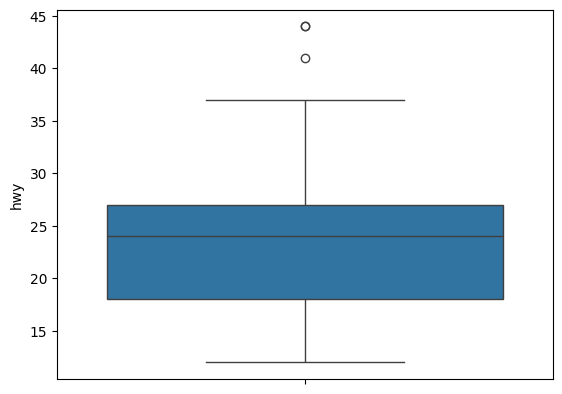

In [82]:
import pandas as pd
mpg = pd.read_csv('data/mpg.csv')

import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy');

##### 2.극단치 기준값 구하기

**(1) 1사분위수, 3사분위수 구하기**

In [105]:
s = pd.Series([1, 2, 3, 4, 5])

In [90]:
s.quantile(.25)

2.0

In [91]:
s.quantile(.50)

3.0

In [106]:
s.quantile([.25, .5, .75, 1])

0.25    2.0
0.50    3.0
0.75    4.0
1.00    5.0
dtype: float64

In [107]:
s = pd.Series([1, 2, 4, 5])

In [108]:
s.quantile(.25)

1.75

In [109]:
s.quantile(.50)

3.0

In [110]:
s.quantile([.25, .5, .75, 1])

0.25    1.75
0.50    3.00
0.75    4.25
1.00    5.00
dtype: float64

In [96]:
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [97]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

**(2) IQR 구하기**

In [98]:
iqr = pct75 - pct25
iqr

9.0

**(3) 하한, 상한 구하기**

In [99]:
pct25 - 1.5 * iqr  # 하한

4.5

In [100]:
pct75 + 1.5 * iqr  # 상한

40.5

### describe() 메소드

In [101]:
mpg['hwy'].describe()

count    234.00
mean      23.44
std        5.95
min       12.00
25%       18.00
50%       24.00
75%       27.00
max       44.00
Name: hwy, dtype: float64

In [102]:
mpg['hwy'].describe()['25%']

18.0

#### 3. 극단치를 결측 처리하기

In [103]:
# 4.5 ~ 40.5 벗어나면 NaN 부여
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

# 결측치 빈도 확인
mpg['hwy'].isna().sum()

3

##### 4. 결측치 제거하고 분석하기

In [104]:
# hwy 결측치 제거
# drv별 분리
# hwy 평균 구하기
mpg.dropna(subset = ['hwy']).groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


### 정리하기

In [ ]:
## 1. 결측치 정제하기
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
pd.isna(df).sum()                                 # 결측치 확인
df_nomiss = df.dropna(subset = ['score'])         # 결측치 제거
df_nomiss = df.dropna(subset = ['score', 'sex'])  # 여러 변수 동시에 결측치 제거


## 2. 이상치 정제하기

# 이상치 확인
df['sex'].value_counts(sort = False)

# 이상치 결측 처리
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])

# 상자 그림으로 극단치 기준값 찾기
pct25 = mpg['hwy'].quantile(.25)  # 1사분위수
pct75 = mpg['hwy'].quantile(.75)  # 3사분위수
iqr = pct75 - pct25               # IQR
pct25 - 1.5 * iqr                 # 하한
pct75 + 1.5 * iqr                 # 상한

# 극단치 결측 처리
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

### **보충학습**

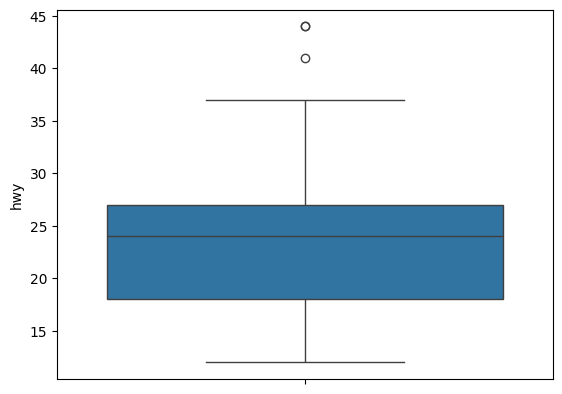

In [ ]:
mpg = pd.read_csv('data/mpg.csv')

import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy');

In [ ]:
def outlier_iqr(data, column):
    # lower, upper 글로벌 변수 선언하기
    global lower, upper

    # 4분위수 기준 지정하기
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)

    # IQR 계산하기
    iqr = q75 - q25

    # outlier cutoff 계산하기
    cut_off = iqr * 1.5

    # lower와 upper bound 값 구하기
    lower, upper = q25 - cut_off, q75 + cut_off

    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기
    data1 = data[data[column] > upper][column]
    data2 = data[data[column] < lower][column]
    print(data1)
    print(data2)
    print('\nIQR:',iqr, 'lower bound:', lower, 'upper bound:', upper)

    # 이상치 총 개수 구하기
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')

In [ ]:
outlier_iqr(mpg, "hwy")

212    44
221    44
222    41
Name: hwy, dtype: int64
Series([], Name: hwy, dtype: int64)

IQR: 9.0 lower bound: 4.5 upper bound: 40.5
총 이상치 개수는 3 이다.


In [ ]:
#사분위수 구하기
q1 = mpg['hwy'].quantile(0.25)
q2 = mpg['hwy'].quantile(0.5)
q3 = mpg['hwy'].quantile(0.75)
q4 = mpg['hwy'].quantile(1)

# IQR값 구하기
iqr = q3-q1

#이상치값 구하기
mpg[(mpg['hwy'] < q1-1.5 * iqr) | (mpg['hwy'] > q3+1.5 * iqr)]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact
